In [15]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv('data/GOOGL_test.csv')
df = df[['date_time', 'close']]
df


,date_time,close
0,2021-03-25 13:30:00+00:00,100.881752
1,2021-03-25 14:30:00+00:00,100.442001
2,2021-03-25 15:30:00+00:00,101.099998
3,2021-03-25 16:30:00+00:00,101.178001
4,2021-03-25 17:30:00+00:00,100.772247
...,...,...
3515,2023-03-24 15:30:00+00:00,104.565002
3516,2023-03-24 16:30:00+00:00,104.695000
3517,2023-03-24 17:30:00+00:00,104.964996
3518,2023-03-24 18:30:00+00:00,105.305000


In [17]:
def strToDatetime(s):
    split_day_month_year = s.split(' ')[0].split('-')
    split_hour_minute_sec = s.split(' ')[1].split('+')[0].split(':')
    year, month, day, hour, minute, second= int(split_day_month_year[0]), int(split_day_month_year[1]), int(split_day_month_year[2]), int(split_hour_minute_sec[0]), int(split_hour_minute_sec[1]), int(split_hour_minute_sec[2])
    return datetime.datetime(year=year, month=month, day=day, hour=hour, minute=minute, second=second)

df['date_time'] = df['date_time'].apply(strToDatetime)
# create the date the index

df.index = df.pop('date_time')
df

,close
date_time,
2021-03-25 13:30:00,100.881752
2021-03-25 14:30:00,100.442001
2021-03-25 15:30:00,101.099998
2021-03-25 16:30:00,101.178001
2021-03-25 17:30:00,100.772247
...,...
2023-03-24 15:30:00,104.565002
2023-03-24 16:30:00,104.695000
2023-03-24 17:30:00,104.964996


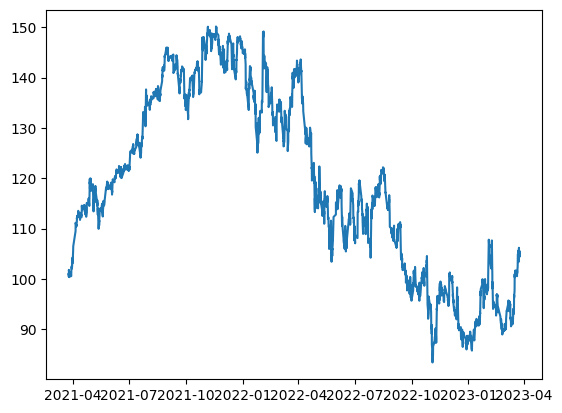

In [18]:
plt.plot(df.index, df['close'])

In [21]:
def dfToWindowedDf(dataframe, first_date_str, last_date_str, n=3):
    first_date = strToDatetime(first_date_str)
    last_date  = strToDatetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        print(len(df_subset))
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        next_date_str_time = next_datetime_str.split('T')[1]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        hour, minute, second = next_date_str_time.split(':')
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year), hour=int(hour), minute=int(minute))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = dfToWindowedDf(df, 
                                '2021-03-25 17:30:00', 
                                '2023-03-24 19:30:00', 
                                n=3)
windowed_df


4
2021-03-25T18:30:00.000000000
0
Error: Window of size 3 is too large for date 2021-03-25 00:00:00


In [20]:
windowed_df